In [1]:
sspa_path = "/archive/projects/SSPA_BRAY/sspa"
data_path = sspa_path + "/biorepository"
bcell_gex=data_path + "/Bcell_GEX_20251201.h5ad "

In [2]:
import scanpy as sc

adata = sc.read_h5ad(bcell_gex.strip())

In [3]:
adata

AnnData object with n_obs × n_vars = 5223 × 36601
    obs: 'group', 'condition', 't2dm', 'cvda', 'pt_id', 'comb_id', 'Sex', 'celltype_subclust'
    var: 'gene_ids', 'feature_types', 'genome', 'mito', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'cell_type_rank_genes_groups', 'dendrogram_cell_type', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'leiden_rank_genes_groups', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'raw'
    obsp: 'connectivities', 'distances'

In [4]:
adata.obs['condition'].value_counts()

condition
c1d1    421
c0d0    395
c0d1    168
Name: count, dtype: int64

In [5]:
adata.obs

,group,condition,t2dm,cvda,pt_id,comb_id,Sex,celltype_subclust
AAAGGTAAGTAGCAAT-1,A,c0d0,0,0,A1,A0,Female,B Cell
AACAAAGCATCGTGGC-1,A,c0d0,0,0,A1,A0,Female,B Cell
AACCAACGTAGTCTGT-1,A,c0d0,0,0,A1,A0,Female,B Cell
AAGCGTTAGGTGAGCT-1,A,c0d0,0,0,A1,A0,Female,B Cell
AAGTGAAAGATAACGT-1,A,c0d0,0,0,A1,A0,Female,B Cell
...,...,...,...,...,...,...,...,...
TTTGACTCACAAAGCG-4,D,NaN,1,1,D5,D5,Male,B Cell
TTTGGAGAGCACTAAA-4,D,NaN,1,1,D2,D2,Female,B Cell
TTTGGTTTCATGAGTC-4,D,NaN,1,1,D2,D2,Female,B Cell
TTTGGTTTCCACTGGG-4,D,NaN,1,1,D5,D5,Male,B Cell


In [6]:
adata.var['highly_variable'].value_counts()

highly_variable
False    31265
True      5336
Name: count, dtype: int64

In [7]:
raw_df = adata.to_df(layer="raw")

In [8]:
raw_df

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.5,AL627309.4,AP006222.2,AL732372.1,...,AC133551.1,AC136612.1,AC136616.1,AC136616.3,AC136616.2,AC141272.1,AC023491.2,AC007325.1,AC007325.4,AC007325.2
AAAGGTAAGTAGCAAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACAAAGCATCGTGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACCAACGTAGTCTGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGCGTTAGGTGAGCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGTGAAAGATAACGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGACTCACAAAGCG-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGAGAGCACTAAA-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTTCATGAGTC-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTTCCACTGGG-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
highly_variable_genes = adata.var[adata.var['highly_variable']].index
raw_df_filtered = raw_df[highly_variable_genes]

In [10]:
raw_df_filtered

,HES4,ISG15,C1orf159,AL390719.3,ATAD3C,ATAD3B,PRKCZ,SKI,DFFB,AL365255.1,...,PCDH11Y,PRKY,USP9Y,DDX3Y,UTY,NLGN4Y,TTTY14,KDM5D,TTTY10,EIF1AY
AAAGGTAAGTAGCAAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACAAAGCATCGTGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACCAACGTAGTCTGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGCGTTAGGTGAGCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGTGAAAGATAACGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGACTCACAAAGCG-4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0
TTTGGAGAGCACTAAA-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTTCATGAGTC-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
TTTGGTTTCCACTGGG-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0


In [11]:
random_sample = raw_df_filtered[adata.obs['t2dm'] == 0]

In [12]:
random_sample

,HES4,ISG15,C1orf159,AL390719.3,ATAD3C,ATAD3B,PRKCZ,SKI,DFFB,AL365255.1,...,PCDH11Y,PRKY,USP9Y,DDX3Y,UTY,NLGN4Y,TTTY14,KDM5D,TTTY10,EIF1AY
AAAGGTAAGTAGCAAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACAAAGCATCGTGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACCAACGTAGTCTGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGCGTTAGGTGAGCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGTGAAAGATAACGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGAGAGGTACATA-1,0.0,6.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTCAAGTGTCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTTCTAAGCGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGCACCAGTTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
import pickle
import numpy as np
import pandas as pd
import scipy.sparse as sp
import os
from typing import Tuple, Dict, List, Optional
import sys

In [14]:
sys.path.append('/labs/Aguiar/SSPA_BRAY/BRay/VariationalInference')

from gene_convertor import GeneIDConverter

# Initialize gene converter globally
gene_converter = GeneIDConverter()

Loaded gene ID cache with 108167 symbol mappings


In [15]:
def load_gene_annotation(annotation_path: str) -> Tuple[pd.DataFrame, Dict, List]:
    """
    Load gene annotation file and convert gene names to Ensembl IDs.
    
    Args:
        annotation_path: Path to gene annotation CSV file
        
    Returns:
        Tuple of (gene_annotation, ensembl_map, ensembl_ids)
    """
    print(f"Loading gene annotation from {annotation_path}...")
    gene_annotation = pd.read_csv(annotation_path)
    gene_annotation = gene_annotation.set_index('Genename')
    
    gene_names = gene_annotation.index.tolist()
    gene_annotation_ensembl_map, gene_annotation_ensembl_ids = gene_converter.symbols_to_ensembl(gene_names)
    
    print(f"Loaded annotation for {len(gene_annotation)} genes")
    
    return gene_annotation, gene_annotation_ensembl_map, gene_annotation_ensembl_ids

In [16]:
gene_annotation_path = "/labs/Aguiar/SSPA_BRAY/BRay/BRAY_FileTransfer/ENS_mouse_geneannotation.csv"
gene_annotation = pd.read_csv(gene_annotation_path)
gene_annotation = gene_annotation.set_index('Genename')

In [17]:
gene_names = gene_annotation.index.tolist()

gene_annotation_ensembl_map, gene_annotation_ensembl_ids = gene_converter.symbols_to_ensembl(gene_names)

Detected gene format: symbol
All 46078 genes found in cache or already in Ensembl format


In [18]:
# Convert gene names to Ensembl IDs
sample_gene_names = random_sample.columns.tolist()
sample_ensembl_map, _ = gene_converter.symbols_to_ensembl(sample_gene_names)
ensembl_names = [sample_ensembl_map.get(gene, gene) for gene in sample_gene_names]
random_sample.columns = ensembl_names

# Remove duplicate genes
print(f"Shape before removing duplicates: {random_sample.shape}")
mask = ~random_sample.columns.duplicated(keep='first')
random_sample = random_sample.loc[:, mask]
print(f"Shape after removing duplicates: {random_sample.shape}")

# Filter for protein-coding genes (requires gene_annotation to be loaded first)
print("Filtering for protein-coding genes...")
protein_coding_genes = gene_annotation[
    gene_annotation['Genetype'] == 'protein_coding'
]['GeneID'].tolist()

common_genes = random_sample.columns.intersection(protein_coding_genes)
random_sample = random_sample[common_genes]
print(f"Final shape after protein coding filter: {random_sample.shape}")


Detected gene format: symbol
All 5336 genes found in cache or already in Ensembl format
Shape before removing duplicates: (2049, 5336)
Shape after removing duplicates: (2049, 3503)
Filtering for protein-coding genes...
Final shape after protein coding filter: (2049, 3446)


In [19]:
random_sample

,ENSMUSG00000035692,ENSMUSG00000029053,ENSMUSG00000029050,ENSMUSG00000029027,ENSMUSG00000042804,ENSMUSG00000028937,ENSMUSG00000024793,ENSMUSG00000028950,ENSMUSG00000028957,ENSMUSG00000028965,...,ENSMUSG00000015214,ENSMUSG00000035776,ENSMUSG00000031397,ENSMUSG00000015290,ENSMUSG00000031402,ENSMUSG00000031200,ENSMUSG00000069044,ENSMUSG00000069045,ENSMUSG00000068457,ENSMUSG00000056673
AAAGGTAAGTAGCAAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACAAAGCATCGTGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACCAACGTAGTCTGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGCGTTAGGTGAGCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGTGAAAGATAACGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGAGAGGTACATA-1,6.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTCAAGTGTCT-1,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTTCTAAGCGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGCACCAGTTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
random_sample = random_sample.sample(n=200, random_state=42)

In [21]:
random_sample

,ENSMUSG00000035692,ENSMUSG00000029053,ENSMUSG00000029050,ENSMUSG00000029027,ENSMUSG00000042804,ENSMUSG00000028937,ENSMUSG00000024793,ENSMUSG00000028950,ENSMUSG00000028957,ENSMUSG00000028965,...,ENSMUSG00000015214,ENSMUSG00000035776,ENSMUSG00000031397,ENSMUSG00000015290,ENSMUSG00000031402,ENSMUSG00000031200,ENSMUSG00000069044,ENSMUSG00000069045,ENSMUSG00000068457,ENSMUSG00000056673
TTCGCTGCACCCTGTT-1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGTGATCGTAACTGCT-1,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
CATGGTAGTGTTTGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACGTAGTAGCTCCGAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0
TGATGGTTCCGTAATG-1,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATGATCGCAAGCGCAA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTCAGAAGTACTTCCC-1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TGCGGCAAGTGATGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTGAGTTTCACAGTGT-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Check the highest expression values in random_sample
print("Highest expression values in random_sample:")
print(f"Maximum value: {random_sample.max().max()}")
print(f"Mean of maximum values per gene: {random_sample.max().mean()}")
print(f"Mean of maximum values per cell: {random_sample.max(axis=1).mean()}")

# Show top 10 highest expression values and their locations
max_values = random_sample.max()
top_genes = max_values.nlargest(10)
print(f"\nTop 10 genes by maximum expression:")
for gene, value in top_genes.items():
    print(f"{gene}: {value}")

# Show some statistics about the expression distribution
print(f"\nExpression distribution statistics:")
print(f"Overall mean: {random_sample.mean().mean():.4f}")
print(f"Overall std: {random_sample.std().std():.4f}")
print(f"Percentage of zeros: {(random_sample == 0).sum().sum() / (random_sample.shape[0] * random_sample.shape[1]) * 100:.2f}%")


Highest expression values in random_sample:
Maximum value: 167.0
Mean of maximum values per gene: 5.295414924621582
Mean of maximum values per cell: 34.209999084472656

Top 10 genes by maximum expression:
ENSMUSG00000026594: 167.0
ENSMUSG00000021699: 161.0
ENSMUSG00000037138: 134.0
ENSMUSG00000039197: 119.0
ENSMUSG00000037922: 93.0
ENSMUSG00000040875: 92.0
ENSMUSG00000030691: 76.0
ENSMUSG00000002365: 70.0
ENSMUSG00000036792: 65.0
ENSMUSG00000057058: 65.0

Expression distribution statistics:
Overall mean: 0.3692
Overall std: 1.1914
Percentage of zeros: 85.75%


In [23]:
# Extract t2dm column from adata.obs for the random_sample indices
t2dm_features = adata.obs.loc[random_sample.index, 't2dm']

# Convert to a DataFrame for easier handling
features_matrix = pd.DataFrame({
    't2dm': t2dm_features
}, index=random_sample.index)

features_matrix

,t2dm
TTCGCTGCACCCTGTT-1,0
AGTGATCGTAACTGCT-1,0
CATGGTAGTGTTTGCA-1,0
ACGTAGTAGCTCCGAC-1,0
TGATGGTTCCGTAATG-1,0
...,...
ATGATCGCAAGCGCAA-1,0
CTCAGAAGTACTTCCC-1,0
TGCGGCAAGTGATGGC-1,0
GTGAGTTTCACAGTGT-3,0


In [24]:
import os
import json
from sklearn.model_selection import train_test_split

# Create output directory
output_dir = '/labs/Aguiar/SSPA_BRAY/BRay/ctrl_sspa_test'
os.makedirs(output_dir, exist_ok=True)

# Split the data: 70% train, 15% validation, 15% test
train_ids, temp_ids = train_test_split(random_sample.index, test_size=0.3, random_state=42)
val_ids, test_ids = train_test_split(temp_ids, test_size=0.5, random_state=42)

print(f"Train size: {len(train_ids)}")
print(f"Validation size: {len(val_ids)}")
print(f"Test size: {len(test_ids)}")

# Save data split cell IDs
data_split = {
    'train': train_ids.tolist(),
    'val': val_ids.tolist(),
    'test': test_ids.tolist()
}

with open(os.path.join(output_dir, 'data_split_cell_ids.json'), 'w') as f:
    json.dump(data_split, f, indent=2)

# Save the expression dataframe (df.pkl)
random_sample.to_pickle(os.path.join(output_dir, 'df.pkl'))

# Save the features dataframe (features.pkl)
features_matrix.to_pickle(os.path.join(output_dir, 'features.pkl'))

# Save train data with full genes (train_data_full_genes.csv)
train_data = random_sample.loc[train_ids]
train_data.to_csv(os.path.join(output_dir, 'train_data_full_genes.csv'))

# Save gene list
gene_list = random_sample.columns.tolist()
with open(os.path.join(output_dir, 'gene_list.txt'), 'w') as f:
    for gene in gene_list:
        f.write(f"{gene}\n")

print(f"\nFiles saved in: {output_dir}")
print(f"- df.pkl: {random_sample.shape}")
print(f"- features.pkl: {features_matrix.shape}")
print(f"- train_data_full_genes.csv: {train_data.shape}")
print(f"- gene_list.txt: {len(gene_list)} genes")
print(f"- data_split_cell_ids.json")

Train size: 140
Validation size: 30
Test size: 30

Files saved in: /labs/Aguiar/SSPA_BRAY/BRay/ctrl_sspa_test
- df.pkl: (200, 3446)
- features.pkl: (200, 1)
- train_data_full_genes.csv: (140, 3446)
- gene_list.txt: 3446 genes
- data_split_cell_ids.json


In [25]:
import gzip

# Load gene programs
gene_programs = pd.read_csv('/labs/Aguiar/SSPA_BRAY/sspa_gene_programs.csv.gz', compression='gzip')

# Load model
with open('/labs/Aguiar/SSPA_BRAY/sspa_model.pkl', 'rb') as f:
    sspa_model = pickle.load(f)

# Load predictions
test_predictions = pd.read_csv('/labs/Aguiar/SSPA_BRAY/sspa_test_predictions.csv.gz', compression='gzip')
val_predictions = pd.read_csv('/labs/Aguiar/SSPA_BRAY/sspa_val_predictions.csv.gz', compression='gzip')

# Load theta matrices
theta_test = pd.read_csv('/labs/Aguiar/SSPA_BRAY/sspa_theta_test.csv.gz', compression='gzip', index_col=0)
theta_train = pd.read_csv('/labs/Aguiar/SSPA_BRAY/sspa_theta_train.csv.gz', compression='gzip', index_col=0)
theta_val = pd.read_csv('/labs/Aguiar/SSPA_BRAY/sspa_theta_val.csv.gz', compression='gzip', index_col=0)

# Load VI summary
with gzip.open('/labs/Aguiar/SSPA_BRAY/sspa_vi_summary.json.gz', 'rt') as f:
    vi_summary = json.load(f)

print("Loaded files:")
print(f"- gene_programs: {gene_programs.shape}")
print(f"- test_predictions: {test_predictions.shape}")
print(f"- val_predictions: {val_predictions.shape}")
print(f"- theta_test: {theta_test.shape}")
print(f"- theta_train: {theta_train.shape}")
print(f"- theta_val: {theta_val.shape}")
print(f"- VI summary keys: {list(vi_summary.keys())}")

Loaded files:
- gene_programs: (20, 3448)
- test_predictions: (30, 4)
- val_predictions: (30, 4)
- theta_test: (30, 20)
- theta_train: (140, 20)
- theta_val: (30, 20)
- VI summary keys: ['hyperparameters', 'data_shapes', 'elbo_history']


In [26]:
vi_summary

{'hyperparameters': {'d': 20,
  'alpha_theta': 2.0,
  'alpha_beta': 2.0,
  'alpha_xi': 2.0,
  'alpha_eta': 2.0,
  'lambda_xi': 2.0,
  'lambda_eta': 1.5,
  'sigma_v': 2.0,
  'sigma_gamma': 1.0,
  'pi_v': 0.7},
 'data_shapes': {'n_genes': 3446,
  'n_train': 140,
  'n_val': 30,
  'n_test': 30,
  'n_factors': 20},
 'elbo_history': [[0, -378933.0334439296],
  [10, -312070.47707269806],
  [20, -323247.0824889236]]}

In [27]:
theta_train

,GP1,GP2,GP3,GP4,GP5,GP6,GP7,GP8,GP9,GP10,GP11,GP12,GP13,GP14,GP15,GP16,GP17,GP18,GP19,GP20
ATCCTATGTCCACAGC-1,0.021290,0.015744,0.014698,0.015864,0.015163,0.015217,0.017862,0.015659,0.017139,0.014019,0.021069,0.013409,0.019818,0.006174,0.008761,0.018473,0.015279,0.016882,0.018197,0.011717
GCCAGCAGTTGTGTTG-2,0.049008,0.068139,0.068075,0.029891,0.032864,0.022504,0.046796,0.052868,0.041042,0.034561,0.038428,0.031724,0.043968,0.039301,0.034524,0.039062,0.051898,0.006128,0.043813,0.042983
ACTGCAATCTCATGGA-2,0.004826,0.005055,0.004724,0.005084,0.004719,0.004341,0.004557,0.005455,0.005191,0.003979,0.003414,0.004849,0.004913,0.005948,0.005256,0.004919,0.003924,0.004285,0.004468,0.005122
GGCACGTAGTGAACAT-4,0.018531,0.026826,0.020921,0.015258,0.027001,0.029539,0.031606,0.032594,0.025913,0.025213,0.015887,0.027485,0.022420,0.033273,0.004716,0.030461,0.020719,0.035291,0.029643,0.005365
TCGGGCATCTGGCTGG-4,0.017174,0.029932,0.036737,0.017074,0.017926,0.015996,0.020828,0.017464,0.015348,0.018762,0.016734,0.015688,0.015600,0.023307,0.015993,0.014368,0.016584,0.025736,0.025321,0.017750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCTACCTAGAGCATAT-4,0.016133,0.021522,0.030464,0.033893,0.027238,0.021584,0.025973,0.039513,0.030274,0.028236,0.032442,0.038044,0.036243,0.026127,0.039625,0.004647,0.049254,0.049318,0.034058,0.033840
GTCATCCTCTCTGGTC-2,0.032323,0.039262,0.037865,0.060309,0.038644,0.035370,0.044463,0.032873,0.036416,0.036218,0.037000,0.025229,0.022605,0.042445,0.039561,0.054074,0.041124,0.039622,0.036329,0.043422
GAGATGGAGAACTCCT-1,0.028538,0.045265,0.056556,0.021297,0.004413,0.030984,0.029502,0.022211,0.036967,0.030775,0.047962,0.027590,0.035639,0.031306,0.042268,0.020629,0.032352,0.027830,0.042718,0.035909
GCACGGTAGCGTGCTC-9,0.010448,0.005525,0.007654,0.006807,0.008313,0.009145,0.009197,0.010428,0.007830,0.009459,0.006967,0.007893,0.010046,0.004823,0.011024,0.007927,0.008857,0.010223,0.009796,0.011601


In [28]:
gene_programs

,program,v_weight,ENSMUSG00000035692,ENSMUSG00000029053,ENSMUSG00000029050,ENSMUSG00000029027,ENSMUSG00000042804,ENSMUSG00000028937,ENSMUSG00000024793,ENSMUSG00000028950,...,ENSMUSG00000015214,ENSMUSG00000035776,ENSMUSG00000031397,ENSMUSG00000015290,ENSMUSG00000031402,ENSMUSG00000031200,ENSMUSG00000069044,ENSMUSG00000069045,ENSMUSG00000068457,ENSMUSG00000056673
0,GP1,-2.240248,0.725474,0.319382,1.575590,0.201807,0.165983,0.220218,0.183853,0.182424,...,2.598628,0.308494,0.226683,0.199007,0.370918,0.296817,0.883866,1.073216,2.529929,0.370739
1,GP2,-2.187434,0.721904,0.314996,1.459644,0.199745,0.162943,0.222860,0.179439,0.179039,...,2.064127,0.285769,0.210944,0.203503,0.323177,0.286589,0.748384,0.868727,1.904547,0.347406
2,GP3,5.005706,0.619163,0.312770,1.889564,0.192527,0.160933,0.217287,0.180330,0.175844,...,2.820345,0.297036,0.212400,0.195607,0.348336,0.296222,0.857050,1.040653,4.486549,0.385053
3,GP4,-2.142941,0.666822,0.326680,1.288514,0.200511,0.165605,0.220834,0.182787,0.181776,...,3.786308,0.313098,0.220303,0.204073,0.341457,0.294873,0.777057,0.985409,1.748632,0.327597
4,GP5,4.896776,0.894117,0.317285,1.630752,0.196922,0.164389,0.209180,0.181083,0.180443,...,2.800441,0.307069,0.217536,0.201689,0.323846,0.290153,0.968045,1.313933,3.050274,0.396021
5,GP6,-2.284771,0.807061,0.330726,1.227135,0.201132,0.168009,0.223412,0.184596,0.183440,...,2.988614,0.309317,0.228529,0.199478,0.357886,0.307438,1.041277,1.295463,2.807298,0.356157
6,GP7,-2.111702,0.837235,0.313178,1.081342,0.202401,0.165844,0.222399,0.180619,0.185021,...,3.505182,0.303516,0.216121,0.201482,0.345322,0.294056,0.789168,0.926207,1.973763,0.357272
7,GP8,-2.305248,0.861072,0.331248,1.647475,0.195585,0.161721,0.210124,0.181321,0.180125,...,3.097859,0.302742,0.216330,0.199911,0.372354,0.303302,0.871068,1.188042,2.966834,0.345087
8,GP9,5.219300,0.683037,0.335840,1.436635,0.198956,0.162204,0.220427,0.178198,0.177089,...,2.886369,0.308344,0.219206,0.193667,0.339776,0.315056,0.942951,1.235408,3.218967,0.400822
9,GP10,5.337443,0.586920,0.304698,1.034914,0.192016,0.160337,0.211570,0.173938,0.177685,...,2.931486,0.291119,0.213315,0.190333,0.341813,0.292349,0.845194,0.993157,2.765636,0.363906


In [29]:
test_predictions

,cell_id,true_label,pred_prob,pred_label
0,TCATCCGCAATGCTCA-8,1,0.625290,1
1,AGTCTCCTCTCCAATT-2,1,0.648308,1
2,CTCCGATTCGGTTGTA-2,1,0.728696,1
3,CCCGAAGTCGGAATTC-5,0,0.588559,1
4,TAGCACATCGTTATCT-1,0,0.551197,1
5,CCTGCATAGAGTGAAG-5,0,0.583234,1
6,TCCTCGAGTCGAGATG-6,1,0.755729,1
7,GTTACCCAGACATAGT-4,1,0.673257,1
8,AAGTACCCATTCGGGC-1,0,0.597131,1
9,CCTGTTGCACGGTCTG-1,0,0.599761,1


In [30]:
# Calculate classification metrics for test predictions
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Get true labels and predictions
y_true_test = test_predictions['true_label']
y_pred_test = test_predictions['pred_label']

# Calculate confusion matrix
cm_test = confusion_matrix(y_true_test, y_pred_test)
tn_test, fp_test, fn_test, tp_test = cm_test.ravel()

print("Test Set Classification Metrics:")
print("="*50)
print(f"True Negatives (TN):  {tn_test}")
print(f"False Positives (FP): {fp_test}")
print(f"False Negatives (FN): {fn_test}")
print(f"True Positives (TP):  {tp_test}")
print()
print(f"Accuracy:  {accuracy_score(y_true_test, y_pred_test):.4f}")
print(f"Precision: {precision_score(y_true_test, y_pred_test):.4f}")
print(f"Recall:    {recall_score(y_true_test, y_pred_test):.4f}")
print(f"F1-Score:  {f1_score(y_true_test, y_pred_test):.4f}")
print()
print("Confusion Matrix:")
print(f"           Predicted")
print(f"         0    1")
print(f"Actual 0 {tn_test:3d}  {fp_test:3d}")
print(f"       1 {fn_test:3d}  {tp_test:3d}")


Test Set Classification Metrics:
True Negatives (TN):  0
False Positives (FP): 11
False Negatives (FN): 0
True Positives (TP):  19

Accuracy:  0.6333
Precision: 0.6333
Recall:    1.0000
F1-Score:  0.7755

Confusion Matrix:
           Predicted
         0    1
Actual 0   0   11
       1   0   19


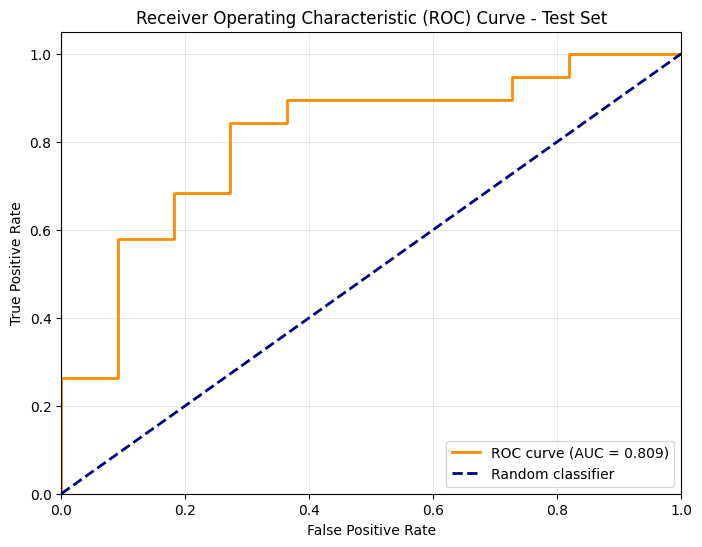

Test Set AUC: 0.8086


In [31]:
# Calculate AUC and plot ROC curve for test predictions
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Get true labels and predicted probabilities
y_true_test = test_predictions['true_label']
y_prob_test = test_predictions['pred_prob']

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true_test, y_prob_test)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"Test Set AUC: {roc_auc:.4f}")


In [32]:
val_predictions

,cell_id,true_label,pred_prob,pred_label
0,CTCCATGAGAGCTTTC-1,0,0.742834,1
1,CCGGACACAGCGACCT-4,1,0.566589,1
2,GGGAAGTGTTACTCAG-1,0,0.748478,1
3,CCGCAAGCATAATCCG-4,1,0.668892,1
4,TGTGTGAGTAGTCACT-4,1,0.579002,1
5,GTAATGCCAAACGTGG-4,1,0.692392,1
6,TACTTGTTCTCACTCG-4,1,0.707893,1
7,TAACACGAGGAGTCTG-2,1,0.620581,1
8,GAACACTCATCATGAC-4,1,0.848615,1
9,CAGGGCTCAATAACCC-9,1,0.713404,1
